# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Feature Engineering, Feature Selection
from sklearn.feature_selection import mutual_info_classif

# Missing values imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer

# Model Evaluation Metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, roc_auc_score, classification_report, accuracy_score,precision_score,recall_score,f1_score

#Model Selection
from sklearn.model_selection import StratifiedKFold,GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.linear_model  import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import neighbors
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier


import warnings
warnings.filterwarnings('ignore')


#  1-DATA

### DATASET => https://www.kaggle.com/competitions/titanic/data

survival ---> Survival --->	0 = No, 1 = Yes

pclass --->	Ticket class ---> 1 = 1st, 2 = 2nd, 3 = 3rd

sex ---> Sex

Age --->	Age in years	

sibsp ---> # of siblings / spouses aboard the Titanic	

parch ---> # of parents / children aboard the Titanic	

ticket ---> Ticket number	

fare ---> Passenger fare	

cabin ---> Cabin number	

embarked ---> Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
gender_sbm = pd.read_csv('gender_submission.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.shape

(891, 12)

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
df_test.shape

(418, 11)

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [10]:
df_test.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.00,996.2500,1100.5000,1204.75,1309.0000
Pclass,418.0,2.265550,0.841838,1.00,1.0000,3.0000,3.00,3.0000
Age,332.0,30.272590,14.181209,0.17,21.0000,27.0000,39.00,76.0000
SibSp,418.0,0.447368,0.896760,0.00,0.0000,0.0000,1.00,8.0000
Parch,418.0,0.392344,0.981429,0.00,0.0000,0.0000,0.00,9.0000
Fare,417.0,35.627188,55.907576,0.00,7.8958,14.4542,31.50,512.3292


In [11]:
gender_sbm.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [12]:
gender_sbm.shape

(418, 2)

In [13]:
gender_sbm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


# 2-EDA

### 2.1 How many NUMERICAL variable are there?

In [14]:
numerical_variables = [feature for feature in df_train.columns if df_train[feature].dtype in ['int_', 'int8', 'int16', 'int32', 'int64', 'uint8', 'uint16',
                               'uint32', 'uint64','float_', 'float16', 'float32','float64']]
print('Number of numerical variables =>',len(numerical_variables),'\nNumerical Variables=>',numerical_variables)

Number of numerical variables => 7 
Numerical Variables=> ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


#### After numericals. Relations between features

sns.jointplot(x)

#### -----------2.1.1 How many CONTINUOUS variable are there ?

In [15]:
continuous_variables =[feature for feature in numerical_variables if len(df_train[feature].unique()) > 25] 
print('Number of continuous variables =>',len(continuous_variables),'\nContinuous Variables=>',continuous_variables)

Number of continuous variables => 3 
Continuous Variables=> ['PassengerId', 'Age', 'Fare']


#### -----------2.1.2 How many DISCRETE variable are there ?

In [16]:
discrete_variables =[feature for feature in numerical_variables if len(df_train[feature].unique()) < 25] 
print('Number of discrete variables =>',len(discrete_variables),'\nDiscrete Variables=>',discrete_variables)

Number of discrete variables => 4 
Discrete Variables=> ['Survived', 'Pclass', 'SibSp', 'Parch']


### 2.2 How many CATEGORICAL variable are there?

In [17]:
categorical_variables = [feature for feature in df_train.columns if df_train[feature].dtype in ['O','bool_']]
print('Number of categorical variables =>',len(categorical_variables),'\nCategorical Variables=>',categorical_variables)

Number of categorical variables => 5 
Categorical Variables=> ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [18]:
# Number of categories in categorical variables
total =0
for feature in categorical_variables:
    print(feature,'=>',df_train[feature].nunique())
    total += df_train[feature].nunique()
print('Total category:',total)

Name => 891
Sex => 2
Ticket => 681
Cabin => 147
Embarked => 3
Total category: 1724


###  2.3 Missing Values

In [19]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [20]:
for column in df_train.columns:
    print('Percentage of null in',column,':',df_train[column].isnull().mean()*100)

Percentage of null in PassengerId : 0.0
Percentage of null in Survived : 0.0
Percentage of null in Pclass : 0.0
Percentage of null in Name : 0.0
Percentage of null in Sex : 0.0
Percentage of null in Age : 19.865319865319865
Percentage of null in SibSp : 0.0
Percentage of null in Parch : 0.0
Percentage of null in Ticket : 0.0
Percentage of null in Fare : 0.0
Percentage of null in Cabin : 77.10437710437711
Percentage of null in Embarked : 0.22446689113355783


Observations:
- Cabin has so many nan values. It can be dropped after analyzing 
- Age has nan values. But it can be filled with some techniques
- Embarked has 2 nan values. It will be filled.

In [21]:
df_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
for column in df_test.columns:
    print('Percentage of null in',column,':',df_test[column].isnull().mean()*100)

Percentage of null in PassengerId : 0.0
Percentage of null in Pclass : 0.0
Percentage of null in Name : 0.0
Percentage of null in Sex : 0.0
Percentage of null in Age : 20.574162679425836
Percentage of null in SibSp : 0.0
Percentage of null in Parch : 0.0
Percentage of null in Ticket : 0.0
Percentage of null in Fare : 0.23923444976076555
Percentage of null in Cabin : 78.22966507177034
Percentage of null in Embarked : 0.0


Observations:
- Cabin has so many nan values. It can be dropped after analyzing 
- Age has nan values. But it can be filled with some techniques
- Fare has 1 nan value. It will be filled.


<Axes: >

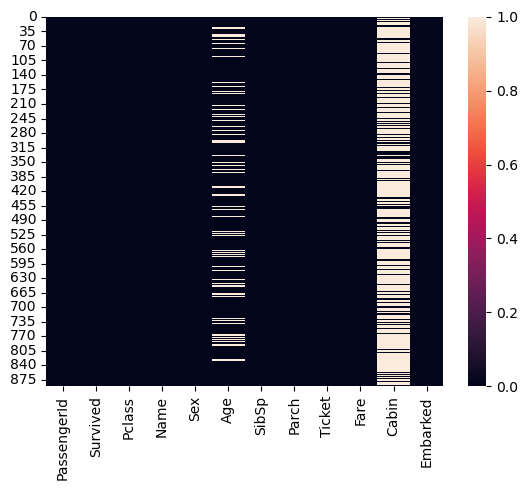

In [23]:
sns.heatmap(df_train.isnull(),linecolor='red')

###  2.4 Feature Distribution

In [24]:
df_train_dist = df_train.copy()
df_train_dist['Survived'] = df_train_dist['Survived'].astype('O')

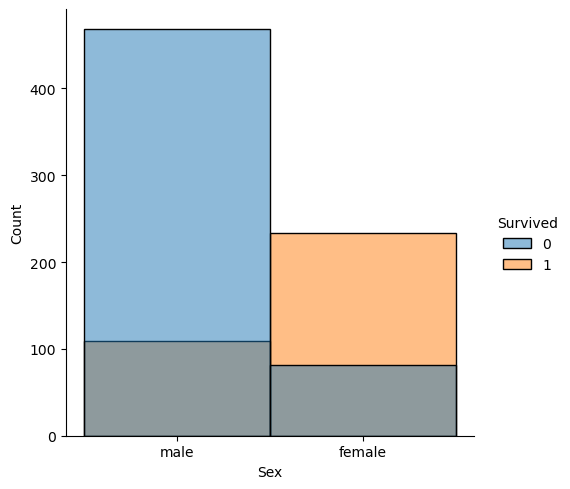

In [25]:
sns.displot(df_train,x=df_train['Sex'], hue = 'Survived', bins=40)

In [26]:
def feature_distr(df,target_var):
    for feature in df.columns:
        if feature == target_var:
            pass
        elif df[feature].dtype=='O':
            sns.countplot(data=df,x=feature,hue=target_var)
        elif df[feature].dtype in ['int_', 'iznt8', 'int16', 'int32', 'int64', 'uint8', 'uint16',
                                   'uint32', 'uint64','float_', 'float16', 'float32','float64']:
            sns.displot(df[feature].dropna(), bins=40)
        plt.show()

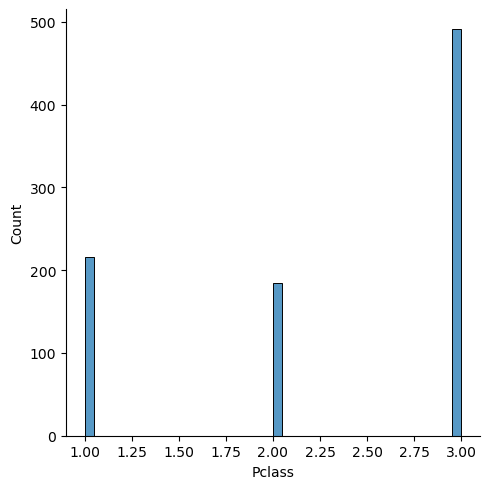

AttributeError: 'numpy.int64' object has no attribute 'startswith'

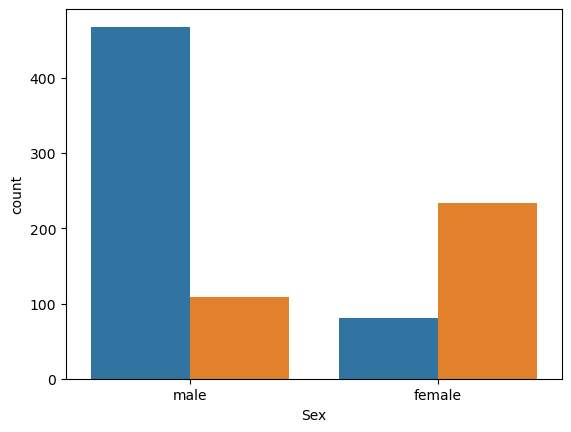

In [27]:
feature_distr(df_train.drop(['Name','Cabin','Ticket','PassengerId'],axis=1),'Survived')

In [30]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Observations:
- Age has so many 0 values.
- Fare has zero values

### 2.5 Duplicated Observations

In [32]:
df_train.duplicated().sum()

0

In [33]:
df_train['PassengerId'].duplicated().sum()

0

In [34]:
df_train['Name'].duplicated().sum()

0

In [35]:
df_train['Ticket'].duplicated().sum()

210

In [36]:
df_train['Ticket'].duplicated().mean()

0.2356902356902357

- So many duplicated in Ticket !

In [37]:
df_test.duplicated().sum()

0

In [38]:
df_test['PassengerId'].duplicated().sum()

0

In [39]:
df_test['Name'].duplicated().sum()

0

In [40]:
df_test['Ticket'].duplicated().sum()

55

In [41]:
df_test['Ticket'].duplicated().mean()

0.13157894736842105

- So many duplicated in Ticket !

### 2.6 Unique Values 

In [42]:
for column in df_train.columns:
    print('==============',column,'==============')
    print(df_train[column].unique())    
    print('*******************************')

============== PassengerId ==============
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 

Observations in Train set:
- PassengerId can be dropped. Because its all values are unique.
- Some names also have other name in parantheses
- Some age should look 0.83,0.92,0.75,0.67,0.42
- Some ticket number have string characters instead of their number
- Some cabin number looks suspicious => F G73 ,D10 D12, B58 B60, F E69, D , C22 C26, B57 B59 B63 B66, T, B96 B98 , B51 B53 B55, F G63, C62 C64, B82 B84
- In fare , there are some 0 values

In [43]:
for column in df_test.columns:
    print('==============',column,'==============')
    print(df_test[column].unique())    
    print('*******************************')

============== PassengerId ==============
[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080

Observations in Test set:
- PassengerId can be dropped. Because its all values are unique.
- Some names also have other name in parantheses
- Some age should look (like 34.5 are okay)=> 0.33, 0.92, 0.75, 0.83, 0.17
- Some ticket number have string characters instead of their number
- Some cabin number looks suspicious => B57 B59 B63 B66, C23 C25 C27, F G63, C55 C57, F, B58 B60, C62 C64, F E46, D, C22 C26, F E57, B51 B53 B55, D10 D12, E39 E41, B52 B54 B56
- In fare , there are some 0 values

###  2.7 In Depth  Analysis of Features

#####  2.7.1 Names

In [44]:
df_train[df_train['Pclass']==1]['Name']

1      Cumings, Mrs. John Bradley (Florence Briggs Th...
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
6                                McCarthy, Mr. Timothy J
11                              Bonnell, Miss. Elizabeth
23                          Sloper, Mr. William Thompson
                             ...                        
871     Beckwith, Mrs. Richard Leonard (Sallie Monypeny)
872                             Carlsson, Mr. Frans Olof
879        Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)
887                         Graham, Miss. Margaret Edith
889                                Behr, Mr. Karl Howell
Name: Name, Length: 216, dtype: object

In [45]:
df_train[df_train['Pclass']==2]['Name']

9               Nasser, Mrs. Nicholas (Adele Achem)
15                 Hewlett, Mrs. (Mary D Kingcome) 
17                     Williams, Mr. Charles Eugene
20                             Fynney, Mr. Joseph J
21                            Beesley, Mr. Lawrence
                           ...                     
866                    Duran y More, Miss. Asuncion
874           Abelson, Mrs. Samuel (Hannah Wizosky)
880    Shelley, Mrs. William (Imanita Parrish Hall)
883                   Banfield, Mr. Frederick James
886                           Montvila, Rev. Juozas
Name: Name, Length: 184, dtype: object

In [46]:
df_train[df_train['Pclass']==3]['Name']

0                       Braund, Mr. Owen Harris
2                        Heikkinen, Miss. Laina
4                      Allen, Mr. William Henry
5                              Moran, Mr. James
7                Palsson, Master. Gosta Leonard
                         ...                   
882                Dahlberg, Miss. Gerda Ulrika
884                      Sutehall, Mr. Henry Jr
885        Rice, Mrs. William (Margaret Norton)
888    Johnston, Miss. Catherine Helen "Carrie"
890                         Dooley, Mr. Patrick
Name: Name, Length: 491, dtype: object

In [47]:
df_train['Name'].str.split(',').str[1].str.split('.').str[0].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [48]:
df_train['Name'].str.split(',').str[1].str.split('.').str[0].nunique()

17

Observations:
##### There are titles in names. These features can be used as a new feature

##### 2.7.2 Ticket

Is there any relation between ticket and Embarked,cabin,pclass ?

In [49]:
df_train[df_train['Pclass']==1]['Ticket'].unique()

array(['PC 17599', '113803', '17463', '113783', '113788', '19950',
       'PC 17601', 'PC 17569', 'PC 17604', '113789', 'PC 17572', '113509',
       '19947', '113572', '36973', 'PC 17605', '113059', 'W.E.P. 5734',
       'PC 17754', 'PC 17759', '35281', '110465', 'PC 17558', '11752',
       'PC 17593', '113776', 'PC 17597', '113505', 'PC 17318', '111240',
       '17764', 'PC 17595', '113767', '111428', 'PC 17610', '112277',
       '35273', '11813', '19943', '19928', '11751', '113514', 'PC 17585',
       '110152', 'PC 17755', '110413', '112059', 'PC 17582', 'PC 17760',
       '113798', 'PC 17596', '13502', '113056', '19877', '11967',
       'PC 17612', '113781', '19988', '17421', 'PC 17758', 'PC 17485',
       '11767', 'PC 17608', '36928', '16966', '111361', '113043',
       'PC 17611', '113784', '113510', '110813', 'PC 17477', '11765',
       '113503', 'PC 17757', '113760', '110564', '13507', '33638',
       '113794', '113786', '113051', '17453', '13509', '17464', '19952',
       '1113

In [50]:
df_train[df_train['Pclass']==2]['Ticket'].unique()


array(['237736', '248706', '244373', '239865', '248698', 'C.A. 24579',
       '11668', 'SC/Paris 2123', '2926', 'C.A. 31026', 'C.A. 34651',
       'C.A. 29395', 'C.A. 33111', 'S.O.C. 14879', '248738', 'SO/C 14885',
       '231919', '244367', '27267', '228414', 'C.A. 29178',
       'SC/PARIS 2133', '231945', 'C.A. 33112', '230080', '244310',
       'S.O.P. 1166', 'C.A. 33595', '250653', 'SC/PARIS 2131', '230136',
       '234604', '28424', '248747', 'F.C.C. 13528', '250646', '243847',
       'W/C 14208', '220367', 'SW/PP 751', '236171', '237442',
       'C.A. 29566', '26707', 'C.A. 31921', '28665', 'SCO/W 1585',
       'W./C. 14263', '250649', '244252', '230433', 'C.A. 17248',
       '250644', '239853', '237798', 'SC/Paris 2163', '226593',
       'P/PP 3381', '250651', 'F.C.C. 13529', '29011', '234818', '28551',
       '248740', '244361', '229236', '248733', '31418', '237671',
       'SC/PARIS 2167', '27849', 'SC 1748', '28403', '244278', '240929',
       '28664', '29106', '28220', '2506

In [51]:
df_train[df_train['Pclass']==3]['Ticket'].unique()

array(['A/5 21171', 'STON/O2. 3101282', '373450', '330877', '349909',
       '347742', 'PP 9549', 'A/5. 2151', '347082', '350406', '382652',
       '345763', '2649', '330923', '347077', '2631', '330959', '349216',
       '335677', '2677', 'A./5. 2152', '345764', '2651', '7546', '349253',
       '330958', 'S.C./A.4. 23567', '370371', '14311', '2662', '349237',
       '3101295', 'A/4. 39886', '2697', 'CA 2144', '2669', '347088',
       '2661', 'S.P. 3464', '3101281', '315151', '2680', '1601', '348123',
       '349208', '374746', '364516', '345767', '345779', '330932',
       '3101278', 'W./C. 6608', 'SOTON/OQ 392086', '343275', '343276',
       '347466', 'C.A. 2315', '364500', '374910', '349245', '349215',
       '7540', '3101276', '349207', '343120', '312991', '349249',
       '371110', '2665', '324669', '4136', '2627', 'STON/O 2. 3101294',
       '370369', 'A4. 54510', '370372', 'C 17369', '2668', '347061',
       '349241', 'SOTON/O.Q. 3101307', 'A/5. 3337', '7534', '2678',
       '347

Ticket has many duplicates. But also has different amount of digit ticket numbers. It's doesn't make sense.Only looked pclass and ticket .Other features should be checked to be sure.

In [52]:
df_train[(df_train['Pclass']==1) & (df_train['Embarked']=='C') ][['Ticket','Embarked','Cabin','Pclass']].head(20)

,Ticket,Embarked,Cabin,Pclass
1,PC 17599,C,C85,1
30,PC 17601,C,NaN,1
31,PC 17569,C,B78,1
34,PC 17604,C,NaN,1
52,PC 17572,C,D33,1
54,113509,C,B30,1
64,PC 17605,C,NaN,1
96,PC 17754,C,A5,1
97,PC 17759,C,D10 D12,1
118,PC 17558,C,B58 B60,1


In [53]:
df_train[(df_train['Pclass']==1) & (df_train['Embarked']=='S') ][['Ticket','Embarked','Cabin','Pclass']].head(50)

,Ticket,Embarked,Cabin,Pclass
3,113803,S,C123,1
6,17463,S,E46,1
11,113783,S,C103,1
23,113788,S,A6,1
27,19950,S,C23 C25 C27,1
35,113789,S,NaN,1
55,19947,S,C52,1
62,36973,S,C83,1
83,113059,S,NaN,1
88,19950,S,C23 C25 C27,1


In [54]:
df_train[(df_train['Pclass']==1) & (df_train['Embarked']=='Q') ][['Ticket','Embarked','Cabin','Pclass']].head(20)

,Ticket,Embarked,Cabin,Pclass
245,19928,Q,C78,1
412,19928,Q,C78,1


In [55]:
df_train[(df_train['Pclass']==2) & (df_train['Embarked']=='C') ][['Ticket','Embarked','Cabin','Pclass']]

,Ticket,Embarked,Cabin,Pclass
9,237736,C,NaN,2
43,SC/Paris 2123,C,NaN,2
122,237736,C,NaN,2
135,SC/PARIS 2133,C,NaN,2
181,SC/PARIS 2131,C,NaN,2
292,SC/Paris 2163,C,D,2
308,P/PP 3381,C,NaN,2
361,SC/PARIS 2167,C,NaN,2
389,SC 1748,C,NaN,2
473,SC/AH Basle 541,C,D,2


In [56]:
df_train[(df_train['Pclass']==3) & (df_train['Embarked']=='C') ][['Ticket','Embarked','Cabin','Pclass']].head(50)

,Ticket,Embarked,Cabin,Pclass
19,2649,C,NaN,3
26,2631,C,NaN,3
36,2677,C,NaN,3
39,2651,C,NaN,3
42,349253,C,NaN,3
48,2662,C,NaN,3
57,2697,C,NaN,3
60,2669,C,NaN,3
65,2661,C,NaN,3
73,2680,C,NaN,3


In [57]:
df_train[['Ticket','Embarked','Cabin','Pclass']]

,Ticket,Embarked,Cabin,Pclass
0,A/5 21171,S,NaN,3
1,PC 17599,C,C85,1
2,STON/O2. 3101282,S,NaN,3
3,113803,S,C123,1
4,373450,S,NaN,3
...,...,...,...,...
886,211536,S,NaN,2
887,112053,S,B42,1
888,W./C. 6607,S,NaN,3
889,111369,C,C148,1


Observations:
#### There are many copies of the ticket. And the ticket numbers have different numbers of digits. Some have 3 digits, some 4,5. To be sure, I looked at the number of digits according to the Pclass,Cabin, Embarked values and again I could not find a pattern. It makes no sense. That's why the ticket column will be removed

#### 2.7.3 Cabin

In [58]:
df_train['Cabin'].isnull().mean()

0.7710437710437711

In [59]:
df_train[df_train['Cabin'].str.len()>4]['Cabin'].shape

(24,)

Observations:
##### In Cabin feature, There are many null and error values.Approximately %80 are useless. So Cabin Feature will be dropped 

### 2.8 Outliers/Anomaly Detection

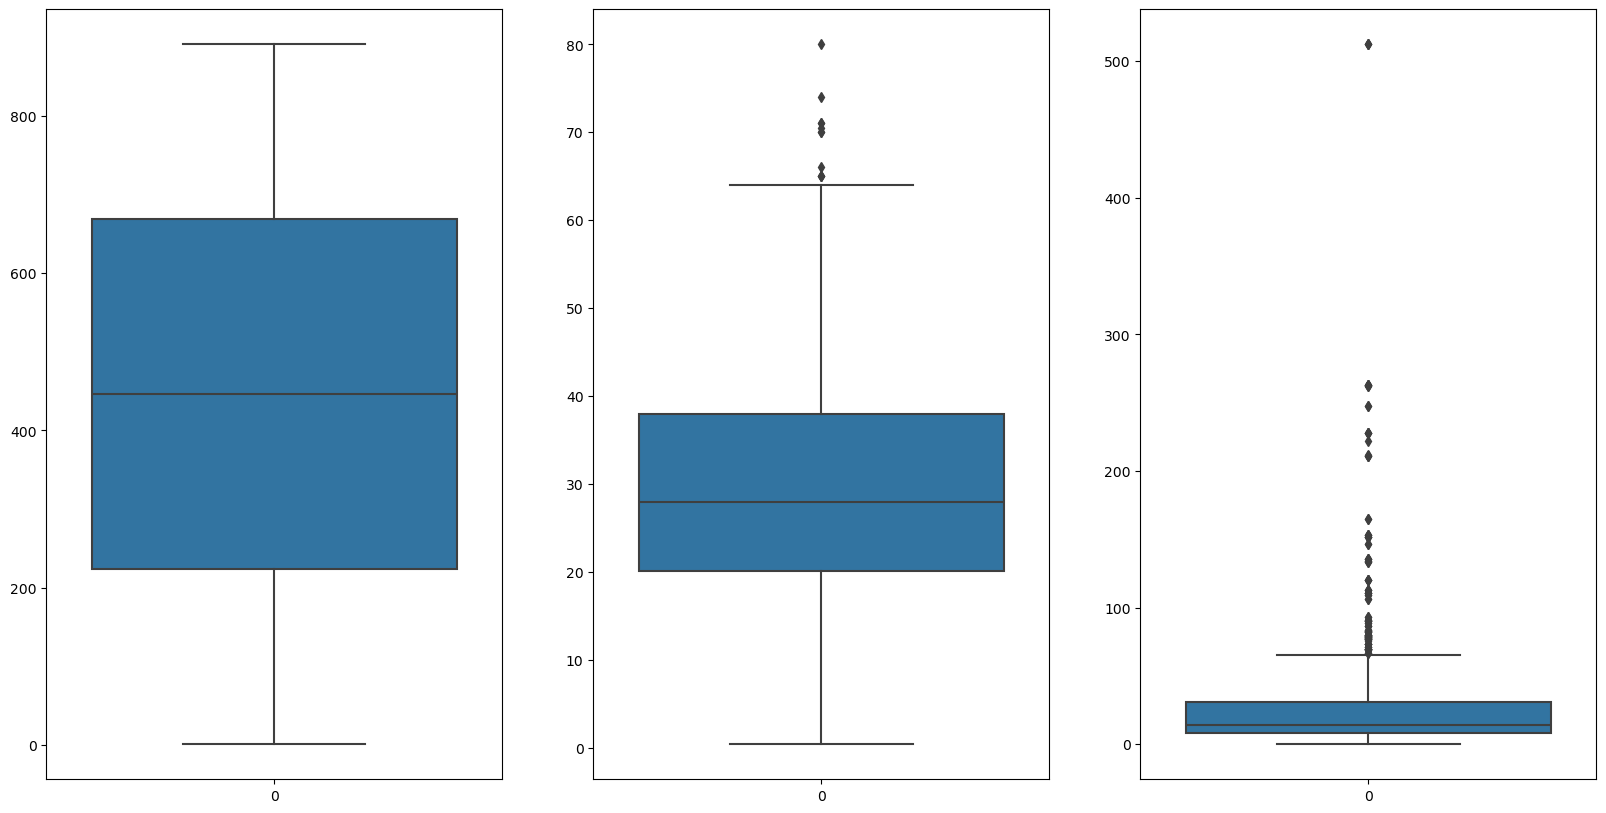

In [60]:
plt.figure(figsize=(20,10))
for i, feature in list(enumerate(continuous_variables)):
    plt.subplot(1,3,i+1)
    sns.boxplot(df_train[feature])
    


In [61]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# 3-Handling the Missing Values

Got filled only features what will be use in model

In [62]:
knn_impute = KNNImputer(n_neighbors=5)
df_train[['Age','Survived']] = knn_impute.fit_transform(df_train[['Age','Survived']])
df_test[['Age','Fare']] = knn_impute.fit_transform(df_test[['Age','Fare']])

# only 2 row have null embarked and embarked is categorical. So i filled with mode
df_train.fillna(value={'Embarked':df_train['Embarked'].mode()[0]},inplace=True)

# 4-Handling Imbalanced Dataset

In [63]:
df_train['Survived'].value_counts()[0]/df_train['Survived'].value_counts().sum()

0.6161616161616161

In [64]:
df_train['Survived'].value_counts()[1]/df_train['Survived'].value_counts().sum()

0.3838383838383838

%62 to %38 . Dataset is balanced

# 5-Handling The Outliers

In [65]:
continuous_variables

['PassengerId', 'Age', 'Fare']

PassengerID will be dropped . AGE and FARE will get examine for outliers

#### Outlier in Train-- (AGE-FARE)

###### Fare

In [66]:
IQR=df_train.Fare.quantile(0.75)-df_train.Fare.quantile(0.25)
IQR

23.0896

In [67]:
#### Extreme outliers
lower_bridge=df_train['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df_train['Fare'].quantile(0.75)+(IQR*3)
lower_bridge, upper_bridge

(-61.358399999999996, 100.2688)

In [68]:
df_train[df_train.Fare<lower_bridge].shape

(0, 12)

In [69]:
df_train[df_train.Fare>upper_bridge].shape

(53, 12)

In [70]:
df_train[df_train.Fare>upper_bridge]['Fare']= upper_bridge

In [71]:
df_train[df_train.Fare>upper_bridge].shape

(53, 12)

###### AGE

In [72]:
IQR=df_train.Age.quantile(0.75)-df_train.Age.quantile(0.25)
IQR

13.0

In [73]:
#### Extreme outliers
lower_bridge=df_train['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df_train['Age'].quantile(0.75)+(IQR*3)
lower_bridge, upper_bridge

(-17.0, 74.0)

In [74]:
df_train[df_train.Age<lower_bridge].shape

(0, 12)

In [75]:
df_train[df_train.Age>upper_bridge].shape

(1, 12)

In [76]:
df_train[df_train.Age>upper_bridge]['Age']=upper_bridge

In [77]:
df_train[df_train.Age>upper_bridge].shape

(1, 12)

#### Outliers in Test-- (AGE-FARE)

###### Fare

In [78]:
IQR=df_test.Fare.quantile(0.75)-df_test.Fare.quantile(0.25)
IQR

23.6042

In [79]:
#### Extreme outliers
lower_bridge=df_test['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df_test['Fare'].quantile(0.75)+(IQR*3)
lower_bridge, upper_bridge

(-62.9168, 102.3126)

In [80]:
df_test[df_test.Fare<lower_bridge].shape

(0, 11)

In [81]:
df_test[df_test.Fare>upper_bridge].shape

(32, 11)

In [82]:
df_test[df_test.Fare>upper_bridge]['Fare']= upper_bridge

In [83]:
df_test[df_test.Fare>upper_bridge].shape

(32, 11)

###### Age

In [84]:
IQR=df_test.Age.quantile(0.75)-df_test.Age.quantile(0.25)
IQR

14.0

In [85]:
#### Extreme outliers
lower_bridge=df_test['Age'].quantile(0.25)-(IQR*3)
upper_bridge=df_test['Age'].quantile(0.75)+(IQR*3)
lower_bridge, upper_bridge

(-20.0, 78.0)

In [86]:
df_test[df_test.Age<lower_bridge].shape

(0, 11)

In [87]:
df_test[df_test.Age>upper_bridge].shape

(0, 11)

In [88]:
df_test[df_test.Age>upper_bridge]['Age']=upper_bridge

In [89]:
df_test[df_test.Age>upper_bridge].shape

(0, 11)

<Axes: xlabel='Fare', ylabel='Density'>

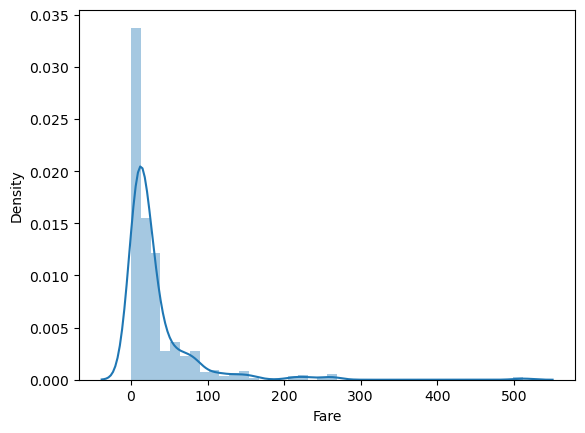

In [90]:
sns.distplot(df_train['Fare'],bins=40)

<Axes: xlabel='Age', ylabel='Density'>

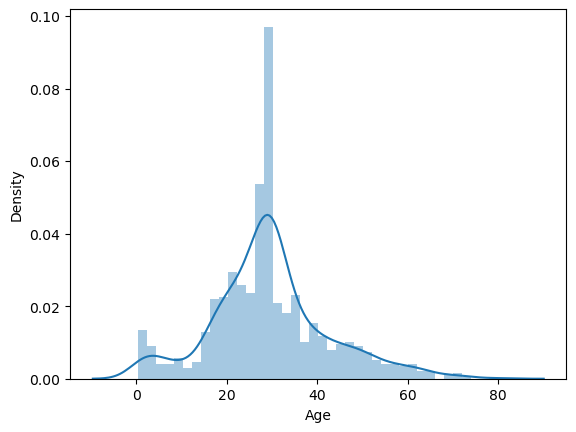

In [91]:
sns.distplot(df_train['Age'],bins=40)

<Axes: xlabel='Fare', ylabel='Density'>

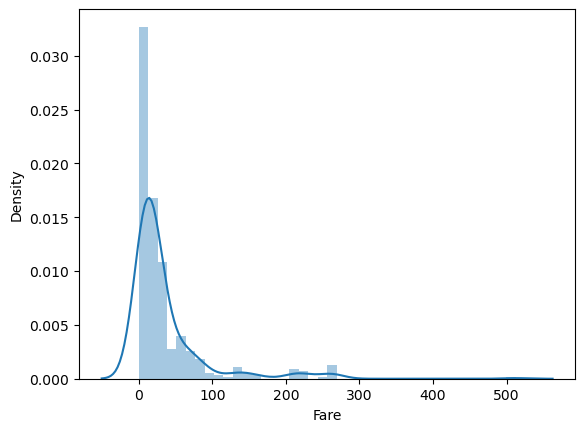

In [92]:
sns.distplot(df_test['Fare'],bins=40)

<Axes: xlabel='Age', ylabel='Density'>

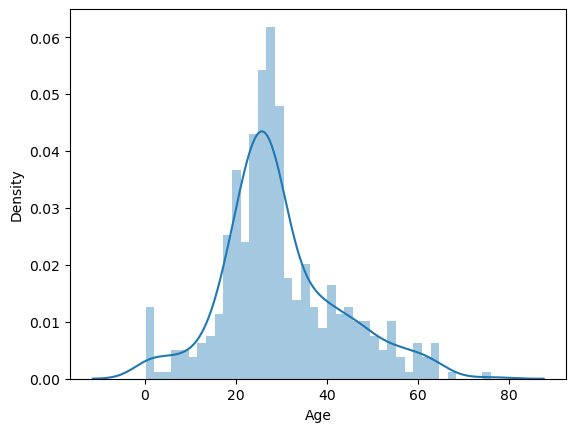

In [93]:
sns.distplot(df_test['Age'],bins=40)

# 6-Converting Categorical to Numerical

In [94]:
gender_sbm.Survived

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [95]:
X_train = df_train.drop('Survived',axis=1)
y_train = df_train['Survived']
X_test = df_test.copy()
y_test = gender_sbm['Survived']

#### Alternative One Hot Encoding

In [96]:
def alternative_ohe(df,percentage,variables):
    ''' 
    One hot encoding with percentage of value counts.
    
    df: DataFrame what we wanted to apply OHE
    
    variables: Features that we wanted to encode. Function takes it because maybe we want to encode only nominals
    
    percentage : Percentage of feature what we wanted to use
    '''
    df_ohe = df.copy()
    for feature in variables:     
        #creating dataframe for every feature and determining Value_counts and value ratio (value_counts/total count)
        dicto = {feature:df_ohe[feature].value_counts(ascending=False).index,
                 'Value_counts':df_ohe[feature].value_counts(ascending=False).values}
        df_fe = pd.DataFrame(data=dicto)
        df_fe['Value_Ratio'] = df_fe['Value_counts']/df_ohe.shape[0]
        
        total_perc=0.0
        
        #analysing all categories of variables
        for i in range (0,len(df_fe)):
            # %90 of data is covered. we can change it
            if (total_perc < (percentage/100)) : 
                total_perc += df_fe.iloc[i:i+1]['Value_Ratio'].values[0]
                #print(total_perc)            
            else:
                df_fe= df_fe.iloc[0:i]                
                break
        # if all category taken, we drop one of them. Because we try to escape curse of dimensionality       
        if (total_perc == 1.0):                
                df_fe.drop(index=len(df_fe)-1,inplace=True)
        #print(df_fe)
        for category in df_fe[feature].values:
            #print(category)            
            df_ohe[feature+'_'+category]= np.where(df_ohe[feature]==category,1,0)
    df_ohe.drop(variables,axis=1,inplace=True)
    return df_ohe

In [97]:
X_train_ohe = alternative_ohe(X_train, 95, ['Embarked','Sex'])
X_train_ohe

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_S,Embarked_C,Sex_male
0,1,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0
2,3,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0
4,5,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",30.1,1,2,W./C. 6607,23.4500,NaN,1,0,0
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,1


In [98]:
X_test_ohe  = alternative_ohe(X_test,95,['Embarked','Sex'] )
X_test_ohe

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_S,Embarked_C,Sex_male
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,1,0,0
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,0,1
3,895,3,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",25.4,0,0,A.5. 3236,8.0500,NaN,1,0,1
414,1306,1,"Oliva y Ocana, Dona. Fermina",39.0,0,0,PC 17758,108.9000,C105,0,1,0
415,1307,3,"Saether, Mr. Simon Sivertsen",38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,1,0,1
416,1308,3,"Ware, Mr. Frederick",25.4,0,0,359309,8.0500,NaN,1,0,1


# 7-Feature Selection And Ordinal Encoding

#### Dropping features what specified EDA observations

PassengerId, Cabin, Ticket will be dropped according to EDA

In [99]:
X_train_ohe.drop(['PassengerId','Cabin','Ticket'],axis=1,inplace=True)

In [100]:
X_test_ohe.drop(['PassengerId','Cabin','Ticket'],axis=1,inplace=True)

In [101]:
y_train = pd.DataFrame(y_train, columns=['Survived'])
y_train

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [102]:
y_test = pd.DataFrame(y_test, columns=['Survived'])
y_test

,Survived
0,0
1,1
2,0
3,0
4,1
...,...
413,0
414,1
415,0
416,0


#### Creating Title from Name feature

In [103]:
X_train_ohe['Title']=X_train_ohe['Name'].str.split(',').str[1].str.split('.').str[0]
X_test_ohe['Title']=X_test_ohe['Name'].str.split(',').str[1].str.split('.').str[0]

In [104]:
X_train_ohe

,Pclass,Name,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Sex_male,Title
0,3,"Braund, Mr. Owen Harris",22.0,1,0,7.2500,1,0,1,Mr
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,71.2833,0,1,0,Mrs
2,3,"Heikkinen, Miss. Laina",26.0,0,0,7.9250,1,0,0,Miss
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,53.1000,1,0,0,Mrs
4,3,"Allen, Mr. William Henry",35.0,0,0,8.0500,1,0,1,Mr
...,...,...,...,...,...,...,...,...,...,...
886,2,"Montvila, Rev. Juozas",27.0,0,0,13.0000,1,0,1,Rev
887,1,"Graham, Miss. Margaret Edith",19.0,0,0,30.0000,1,0,0,Miss
888,3,"Johnston, Miss. Catherine Helen ""Carrie""",30.1,1,2,23.4500,1,0,0,Miss
889,1,"Behr, Mr. Karl Howell",26.0,0,0,30.0000,0,1,1,Mr


In [105]:
X_train_ohe['Title'].value_counts()

Title
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
Name: count, dtype: int64

In [106]:
X_train_ohe['Title'].value_counts().index[:4]

Index([' Mr', ' Miss', ' Mrs', ' Master'], dtype='object', name='Title')

In [107]:
X_train_ohe['Title'].value_counts().index[4:]

Index([' Dr', ' Rev', ' Mlle', ' Major', ' Col', ' the Countess', ' Capt',
       ' Ms', ' Sir', ' Lady', ' Mme', ' Don', ' Jonkheer'],
      dtype='object', name='Title')

In [108]:
X_test_ohe['Title'].value_counts()

Title
 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
Name: count, dtype: int64

In [109]:
X_test_ohe['Title'].value_counts().index[4:]

Index([' Col', ' Rev', ' Ms', ' Dr', ' Dona'], dtype='object', name='Title')

In [110]:
X_train_ohe.drop('Name',axis=1,inplace=True)

In [111]:
X_test_ohe.drop('Name',axis=1, inplace=True)

In [112]:
X_train_ohe

,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Sex_male,Title
0,3,22.0,1,0,7.2500,1,0,1,Mr
1,1,38.0,1,0,71.2833,0,1,0,Mrs
2,3,26.0,0,0,7.9250,1,0,0,Miss
3,1,35.0,1,0,53.1000,1,0,0,Mrs
4,3,35.0,0,0,8.0500,1,0,1,Mr
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1,Rev
887,1,19.0,0,0,30.0000,1,0,0,Miss
888,3,30.1,1,2,23.4500,1,0,0,Miss
889,1,26.0,0,0,30.0000,0,1,1,Mr


In [113]:
X_train_ohe['Title'] = X_train_ohe['Title'].replace([' Mlle',' Ms'], ' Miss')
X_train_ohe['Title'] = X_train_ohe['Title'].replace(' Mme', ' Mrs')
X_train_ohe['Title'] = X_train_ohe['Title'].replace([' Dr', ' Rev',' Major', ' Col', ' the Countess', ' Capt',' Sir', ' Lady',' Don', ' Jonkheer'], 'Other')


X_test_ohe['Title'] = X_test_ohe['Title'].replace([' Col', ' Rev', ' Dr', ' Dona'], 'Other')
X_test_ohe['Title'] = X_test_ohe['Title'].replace([' Mlle',' Ms'], ' Miss')
X_test_ohe['Title'] = X_test_ohe['Title'].replace(' Mme', ' Mrs')


In [114]:
X_train_ohe['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', 'Other'], dtype=object)

In [115]:
X_test_ohe['Title'].unique()

array([' Mr', ' Mrs', ' Miss', ' Master', 'Other'], dtype=object)

In [116]:
X_train_ohe['Title']

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886    Other
887     Miss
888     Miss
889       Mr
890       Mr
Name: Title, Length: 891, dtype: object

In [117]:
title_mapping = {" Mr": 1, " Miss": 2, " Mrs": 3, " Master": 4, "Other": 5}
X_train_ohe['Title'] = X_train_ohe['Title'].map(title_mapping)
X_test_ohe['Title'] = X_test_ohe['Title'].map(title_mapping)

In [118]:
X_train_ohe['Title'].unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [119]:
X_test_ohe['Title'].unique()

array([1, 3, 2, 4, 5], dtype=int64)

In [120]:
X_train_ohe

,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Sex_male,Title
0,3,22.0,1,0,7.2500,1,0,1,1
1,1,38.0,1,0,71.2833,0,1,0,3
2,3,26.0,0,0,7.9250,1,0,0,2
3,1,35.0,1,0,53.1000,1,0,0,3
4,3,35.0,0,0,8.0500,1,0,1,1
...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,0,1,5
887,1,19.0,0,0,30.0000,1,0,0,2
888,3,30.1,1,2,23.4500,1,0,0,2
889,1,26.0,0,0,30.0000,0,1,1,1


Now all features are numerical.

#### Feature Importance

In [121]:
X_train_ohe.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_S    0
Embarked_C    0
Sex_male      0
Title         0
dtype: int64

In [122]:
y_train

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [123]:
mi_values = mutual_info_classif(X_train_ohe, y_train, discrete_features='auto')
mi_values

array([0.03451824, 0.13636415, 0.00732031, 0.00829433, 0.14084004,
       0.00843124, 0.00921366, 0.14017574, 0.17129982])

In [124]:
feature_importance = pd.DataFrame(data=mi_values,index=X_train_ohe.columns, columns=['Feature_Importance']).sort_values(ascending=False,by="Feature_Importance")

In [125]:
feature_importance

,Feature_Importance
Title,0.171300
Fare,0.140840
Sex_male,0.140176
Age,0.136364
Pclass,0.034518
Embarked_C,0.009214
Embarked_S,0.008431
Parch,0.008294
SibSp,0.007320


In [126]:
list(feature_importance.index)

['Title',
 'Fare',
 'Sex_male',
 'Age',
 'Pclass',
 'Embarked_C',
 'Embarked_S',
 'Parch',
 'SibSp']

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Title'),
  Text(1, 0, 'Fare'),
  Text(2, 0, 'Sex_male'),
  Text(3, 0, 'Age'),
  Text(4, 0, 'Pclass'),
  Text(5, 0, 'Embarked_C'),
  Text(6, 0, 'Embarked_S'),
  Text(7, 0, 'Parch'),
  Text(8, 0, 'SibSp')])

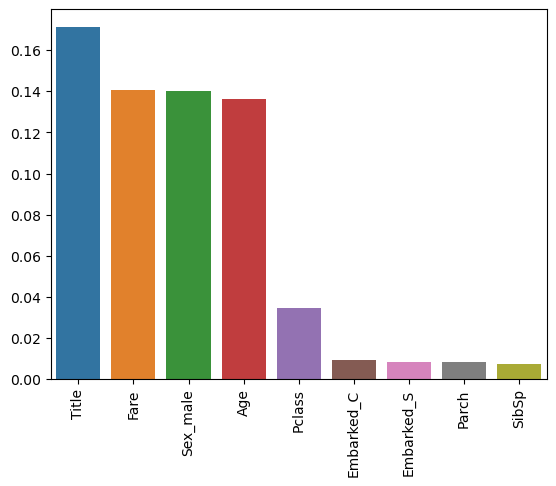

In [127]:
sns.barplot(data=feature_importance.T);
plt.xticks(rotation='vertical')


I decided to keep features same. Because every feature effect at least %1 

#### Features Relations - Correlations

In [128]:
X_train_ohe.corr()

,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Sex_male,Title
Pclass,1.000000,-0.330049,0.083081,0.018443,-0.549500,0.074053,-0.243292,0.131900,-0.173929
Age,-0.330049,1.000000,-0.230102,-0.175890,0.091060,-0.009283,0.029524,0.094616,-0.103477
SibSp,0.083081,-0.230102,1.000000,0.414838,0.159651,0.068734,-0.059528,-0.114631,0.269623
Parch,0.018443,-0.175890,0.414838,1.000000,0.216225,0.060814,-0.011069,-0.245489,0.315784
Fare,-0.549500,0.091060,0.159651,0.216225,1.000000,-0.162184,0.269335,-0.182333,0.136310
Embarked_S,0.074053,-0.009283,0.068734,0.060814,-0.162184,1.000000,-0.782742,0.119224,-0.057485
Embarked_C,-0.243292,0.029524,-0.059528,-0.011069,0.269335,-0.782742,1.000000,-0.082853,0.057499
Sex_male,0.131900,0.094616,-0.114631,-0.245489,-0.182333,0.119224,-0.082853,1.000000,-0.502713
Title,-0.173929,-0.103477,0.269623,0.315784,0.136310,-0.057485,0.057499,-0.502713,1.000000


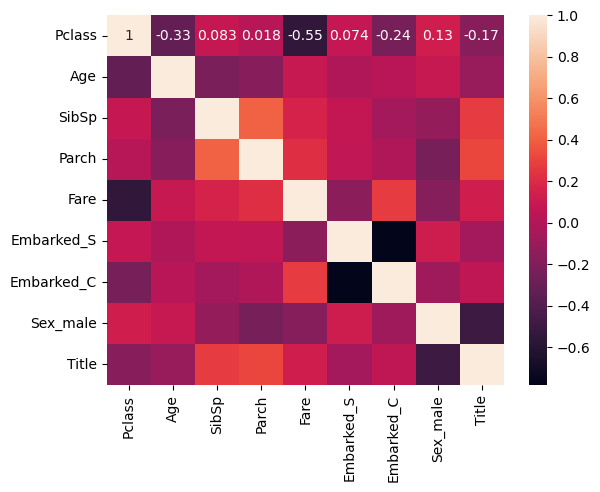

In [129]:
sns.heatmap(X_train_ohe.corr(),annot=True);

# 8-Model Creation

### 8.1 Predict without Hyper-Parameter Optimization

##### Functions

In [130]:
models = {    
    'LogisticRegression': LogisticRegression(),    
    'KNeighborsClassifier': KNeighborsClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(learning_rate=0.5, random_state=2),
    'RidgeClassifier': RidgeClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'SVC': SVC(),
    'LightGBMClassifier': LGBMClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoostClassifier': CatBoostClassifier(metric_period=100)
}

In [131]:
model_names = []
auc_scores = []
accuracies = []
precisions = []
recalls = []

for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")

    model_instance.fit(X_train_ohe, y_train)
    y_pred = model_instance.predict(X_test_ohe)    
    if model_name not in ['RidgeClassifier','SVC']:
        y_pred_prob = model_instance.predict_proba(X_test_ohe)    
        auc_score = round(roc_auc_score(y_test, y_pred_prob[:, 1]), 4)    
    accuracy = round(accuracy_score(y_test,y_pred),4)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    model_names.append(model_name)        
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    if model_name  in ['RidgeClassifier','SVC']:
        auc_scores.append(0)
    else:
        auc_scores.append(auc_score)
        
    if model_name not in ['RidgeClassifier','SVC']:
        print("AUC Score:",auc_score)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')    
    
    print("\n")

-----LogisticRegression-----
AUC Score: 0.9712
Accuracy: 0.9402
Precision: 0.8944099378881988
Recall: 0.9473684210526315


-----KNeighborsClassifier-----
AUC Score: 0.6901
Accuracy: 0.6555
Precision: 0.521978021978022
Recall: 0.625


-----AdaBoostClassifier-----
AUC Score: 0.9658
Accuracy: 0.9522
Precision: 0.9125
Recall: 0.9605263157894737


-----RidgeClassifier-----
Accuracy: 0.9689
Precision: 0.9426751592356688
Recall: 0.9736842105263158


-----GradientBoostingClassifier-----
AUC Score: 0.9163
Accuracy: 0.8301
Precision: 0.7425149700598802
Recall: 0.8157894736842105


-----SVC-----
Accuracy: 0.6531
Precision: 0.5443037974683544
Recall: 0.28289473684210525


-----LightGBMClassifier-----
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000191 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM

##### Results

In [137]:
results = pd.DataFrame({'Model': model_names,'AUC_score': auc_scores, 'Accuracy':accuracies,'Precision':precisions,'Recall':recalls})

In [138]:
results.sort_values(by='AUC_score', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall
0,LogisticRegression,0.9712,0.9402,0.894410,0.947368
2,AdaBoostClassifier,0.9658,0.9522,0.912500,0.960526
4,GradientBoostingClassifier,0.9163,0.8301,0.742515,0.815789
9,CatBoostClassifier,0.8992,0.8254,0.733728,0.815789
7,RandomForestClassifier,0.8732,0.7847,0.682353,0.763158
6,LightGBMClassifier,0.8535,0.7823,0.680473,0.756579
8,XGBoost,0.8427,0.7632,0.651429,0.750000
1,KNeighborsClassifier,0.6901,0.6555,0.521978,0.625000
3,RidgeClassifier,0.0000,0.9689,0.942675,0.973684
5,SVC,0.0000,0.6531,0.544304,0.282895


In [139]:
results.sort_values(by='Accuracy', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall
3,RidgeClassifier,0.0000,0.9689,0.942675,0.973684
2,AdaBoostClassifier,0.9658,0.9522,0.912500,0.960526
0,LogisticRegression,0.9712,0.9402,0.894410,0.947368
4,GradientBoostingClassifier,0.9163,0.8301,0.742515,0.815789
9,CatBoostClassifier,0.8992,0.8254,0.733728,0.815789
7,RandomForestClassifier,0.8732,0.7847,0.682353,0.763158
6,LightGBMClassifier,0.8535,0.7823,0.680473,0.756579
8,XGBoost,0.8427,0.7632,0.651429,0.750000
1,KNeighborsClassifier,0.6901,0.6555,0.521978,0.625000
5,SVC,0.0000,0.6531,0.544304,0.282895


In [140]:
results.sort_values(by='Precision', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall
3,RidgeClassifier,0.0000,0.9689,0.942675,0.973684
2,AdaBoostClassifier,0.9658,0.9522,0.912500,0.960526
0,LogisticRegression,0.9712,0.9402,0.894410,0.947368
4,GradientBoostingClassifier,0.9163,0.8301,0.742515,0.815789
9,CatBoostClassifier,0.8992,0.8254,0.733728,0.815789
7,RandomForestClassifier,0.8732,0.7847,0.682353,0.763158
6,LightGBMClassifier,0.8535,0.7823,0.680473,0.756579
8,XGBoost,0.8427,0.7632,0.651429,0.750000
5,SVC,0.0000,0.6531,0.544304,0.282895
1,KNeighborsClassifier,0.6901,0.6555,0.521978,0.625000


In [141]:
results.sort_values(by='Recall', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall
3,RidgeClassifier,0.0000,0.9689,0.942675,0.973684
2,AdaBoostClassifier,0.9658,0.9522,0.912500,0.960526
0,LogisticRegression,0.9712,0.9402,0.894410,0.947368
4,GradientBoostingClassifier,0.9163,0.8301,0.742515,0.815789
9,CatBoostClassifier,0.8992,0.8254,0.733728,0.815789
7,RandomForestClassifier,0.8732,0.7847,0.682353,0.763158
6,LightGBMClassifier,0.8535,0.7823,0.680473,0.756579
8,XGBoost,0.8427,0.7632,0.651429,0.750000
1,KNeighborsClassifier,0.6901,0.6555,0.521978,0.625000
5,SVC,0.0000,0.6531,0.544304,0.282895


##### Results-Barplot

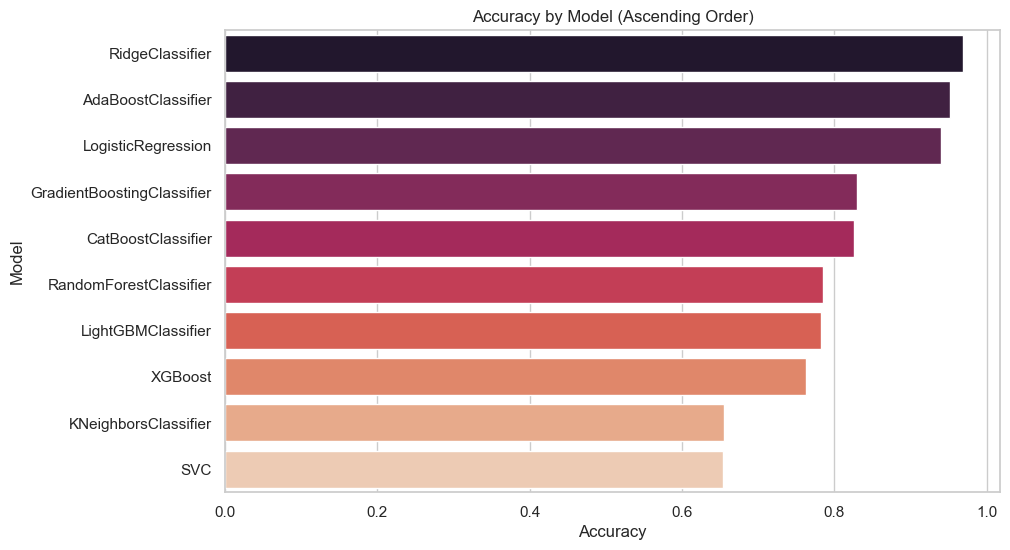

In [142]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='Accuracy', y='Model', data=results.sort_values(by='Accuracy', ascending=False), palette="rocket")
ax.set(xlabel="Accuracy", ylabel="Model")
plt.title("Accuracy by Model (Ascending Order)")
plt.show()

### 8.2 Hyper-Parameter Optimizations

#### 8.2.1 Logistic Regression Hyper-Parameter Optimization

##### Functions

In [143]:
log_grid = {'solver': ['newton-cg', 'liblinear','newton-cholesky', 'sag', 'saga','lbfgs'],
'penalty' : ['l1', 'l2', 'elasticnet', None],
'C' : [100, 10, 1.0, 0.5, 0.1, 0.01]}

In [144]:
log_fc= LogisticRegression()
log_cv = GridSearchCV(log_fc,param_grid=log_grid,cv=3,n_jobs=-1).fit(X_train_ohe, y_train)
log_cv.best_params_

{'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}

In [145]:
log_cv_best_params= {'C': 0.5, 'penalty': 'l1', 'solver': 'liblinear'}

#### 8.2.2 KNN Hyper-Parameter Optimization

##### Functions

In [146]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [147]:
knn_grid = {
    'n_neighbors':[i for i in range(1,21,2)],
    'metric':['cityblock','cosine','euclidean','haversine','l1','l2','manhattan','nan-euclidean'],
    'weights': ['uniform','distance']    
}

In [148]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn,param_grid=knn_grid,cv=3,n_jobs=-1).fit(X_train_ohe, y_train)
knn_cv.best_params_

{'metric': 'cityblock', 'n_neighbors': 5, 'weights': 'uniform'}

In [149]:
knn_cv_best_params = {'metric': 'cityblock', 'n_neighbors': 5, 'weights': 'uniform'}

#### 8.2.3 AdaBoostClassifier Hyper-Parameter Optimization

##### Functions

In [150]:
AdaBoostClassifier().get_params()

{'algorithm': 'SAMME.R',
 'base_estimator': 'deprecated',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}

In [151]:
ada_grid = {
    'n_estimators':[i for i in range(50,500,50)],
    'learning_rate':[0.001,0.01,0.1,0.5,0.8,1,2]
}

In [152]:
adaBoost = AdaBoostClassifier()
ada_cv = GridSearchCV(adaBoost,param_grid=ada_grid,cv=3,n_jobs=-1,verbose=2).fit(X_train_ohe,y_train)
ada_cv.best_params_

Fitting 3 folds for each of 63 candidates, totalling 189 fits


{'learning_rate': 0.8, 'n_estimators': 200}

In [153]:
ada_cv_best_params = {'learning_rate': 0.8, 'n_estimators': 200}

#### 8.2.4 RidgeClassifier Hyper-Parameter Optimization

##### Functions

In [154]:
ridge_grid = {
    'alpha': [i for i in np.linspace(0.1,1.0,10)]
}

In [155]:
ridge = RidgeClassifier()
ridge_cv= GridSearchCV(ridge,param_grid=ridge_grid,cv=3,n_jobs=-1,verbose=3).fit(X_train_ohe,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [156]:
ridge_cv.best_params_

{'alpha': 0.1}

In [157]:
ridge_cv_best_params = {'alpha': 0.1}

#### 8.2.5 GradientBoostingClassifier Hyper-Parameter Optimization

##### Functions

In [158]:
GradientBoostingClassifier().get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [159]:
gbm_grid = {
    'learning_rate': [0.001,0.01,0.1,0.5],    
    'n_estimators' : [50, 100, 400, 1000],
    'subsample':[0.5, 0.7, 1.0],
    'max_depth':[3, 7, 9]
}

In [160]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV(gbm,param_grid=gbm_grid,cv=3,n_jobs=-1,verbose=2).fit(X_train_ohe,y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


In [161]:
gbm_cv.best_params_

{'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.7}

In [162]:
gbm_cv_best_params = {'learning_rate': 0.001,
 'max_depth': 7,
 'n_estimators': 1000,
 'subsample': 0.7}

#### 8.2.6 SVC Hyper-Parameter Optimization

##### Functions

In [163]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [164]:
svc_grid = {
    'kernel' :['linear','poly','rbf','sigmoid'],
    'C' : [100, 10, 1.0, 0.1, 0.001]
}

In [165]:
svc = SVC()
svc_cv = GridSearchCV(svc,param_grid=svc_grid,cv=3,n_jobs=-1,verbose=2).fit(X_train_ohe,y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [166]:
svc_cv.best_params_

{'C': 0.1, 'kernel': 'linear'}

In [167]:
svc_cv_best_params={'C': 0.1, 'kernel': 'linear'}

#### 8.2.7 LightGBMClassifier Hyper-Parameter Optimization

##### Functions

In [168]:
LGBMClassifier().get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [169]:
lgbm_grid = {
    'boosting_type':['gbdt','rf'],    
    'learning_rate':[0.01,0.05,0.08,0.1,0.2,0.4],
    'n_estimators':[10,20,50,100,200],
    'max_depth':[2,3,5,7,9]
}

In [170]:
lgbm = LGBMClassifier(objective=['binary'])
lgbm_cv = GridSearchCV(lgbm,param_grid=lgbm_grid,cv=3,n_jobs=-1).fit(X_train_ohe,y_train)

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000225 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 229
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No furth

In [171]:
lgbm_cv.best_params_

{'boosting_type': 'gbdt',
 'learning_rate': 0.05,
 'max_depth': 9,
 'n_estimators': 100}

In [172]:
lgbm_cv_best_params = {'boosting_type': 'gbdt',
 'learning_rate': 0.05,
 'max_depth': 9,
 'n_estimators': 100}

#### 8.2.8 RandomForestClassifier Hyper-Parameter Optimization

##### Functions

In [173]:
RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [174]:
#Yine de araştırılmalı
rf_grid = {
    'bootstrap':[True,False],
    'criterion': ['gini', 'entropy','log_loss'],
    'max_depth': [2,3,5,7,9],
    'max_features': ['sqrt','auto'],
    'min_samples_split': [2,5,7,9],
    'min_samples_leaf': [2,3,4],
    'n_estimators':[20,50,100,200],
}

In [175]:
rf = RandomForestClassifier()
rf_cv = GridSearchCV(rf, param_grid=rf_grid,cv=3,n_jobs=-1).fit(X_train_ohe,y_train)

In [176]:
rf_cv.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 100}

##### Results RandomizedSearch

In [177]:
rf= RandomForestClassifier()
rf_rdcv= RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,cv=3,n_iter=100,n_jobs=-1,verbose=2).fit(X_train_ohe,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [178]:
rf_rdcv.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'entropy',
 'bootstrap': True}

##### Results GridSearchCV 

In [179]:
rf= RandomForestClassifier()
rf_cv= GridSearchCV(estimator=rf,param_grid=rf_grid,cv=3,n_jobs=-1,verbose=2).fit(X_train_ohe,y_train)

Fitting 3 folds for each of 2880 candidates, totalling 8640 fits


In [180]:
rf_cv.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 9,
 'n_estimators': 100}

In [181]:
rf_cv_best_params= {'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 7,
 'n_estimators': 50}

#### 8.2.9 XGBoost Hyper-Parameter Optimization

##### Functions

XGBClassifier()

In [182]:
xgb_grid = {
    'learning_rate':[0.01, 0.05, 0.1, 0.3],
    'max_depth':[3, 5, 7, 9],
    'n_estimators': [20, 50, 100, 200],
    'colsample_bytree':[0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'reg_alpha':  [0, 0.01, 0.1, 1.0],
    'reg_lambda':  [0, 0.01, 0.1, 1.0]
}

xgb_cl = XGBClassifier()
xgb_cl_cv = GridSearchCV(xgb_cl,param_grid=xgb_grid,cv=3,n_jobs=-1).fit(X_train_ohe,y_train)

##### Results RandomizedSearchCV

In [184]:
xgb_cl = XGBClassifier()
xgb_cl_cv = RandomizedSearchCV(estimator=xgb_cl,param_distributions=xgb_grid,cv=3,n_iter=100,n_jobs=-1,verbose=3).fit(X_train_ohe,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [185]:
xgb_cl_cv.best_params_

{'reg_lambda': 0.1,
 'reg_alpha': 1.0,
 'n_estimators': 200,
 'max_depth': 7,
 'learning_rate': 0.05,
 'gamma': 0.2,
 'colsample_bytree': 0.7}

##### Results GridSearchCV

In [186]:
xgb_cl = XGBClassifier()
xgbcl_cv = GridSearchCV(xgb_cl,param_grid=xgb_grid,cv=3,n_jobs=-1).fit(X_train_ohe,y_train)

In [187]:
xgbcl_cv.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 200,
 'reg_alpha': 1.0,
 'reg_lambda': 0.01}

In [188]:
xgbcl_cv_best_params ={'colsample_bytree': 0.7,
 'gamma': 0.2,
 'learning_rate': 0.05,
 'max_depth': 7,
 'n_estimators': 200,
 'reg_alpha': 1.0,
 'reg_lambda': 0.01}

#### 8.2.10 CatBoostRegressor Hyper-Parameter Optimization

##### Functions

CatBoostClassifier()

In [189]:
catb_grid = {
    'learning_rate':[0.01, 0.05, 0.1, 0.3],
    'iterations':[50, 100, 200, 400],
    'depth':[3, 5, 7, 9],
    'subsample': [0.5, 0.7, 0.9, 1.0],
    'colsample_bylevel': [0.5, 0.7, 0.9, 1.0],
    'border_count': [32, 64, 128, 256]
}

##### Results RandomizedSearchCV

In [190]:
catb = CatBoostClassifier()
catb_rd = RandomizedSearchCV(estimator=catb,param_distributions=catb_grid,cv=3,n_iter=100,n_jobs=-1,verbose=3).fit(X_train_ohe,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0:	learn: 0.5950747	total: 852us	remaining: 84.4ms
1:	learn: 0.5340706	total: 3.11ms	remaining: 152ms
2:	learn: 0.4937098	total: 4.01ms	remaining: 130ms
3:	learn: 0.4695518	total: 4.95ms	remaining: 119ms
4:	learn: 0.4437463	total: 5.73ms	remaining: 109ms
5:	learn: 0.4253569	total: 6.52ms	remaining: 102ms
6:	learn: 0.4137517	total: 7.4ms	remaining: 98.3ms
7:	learn: 0.4092086	total: 8.18ms	remaining: 94.1ms
8:	learn: 0.4046430	total: 8.97ms	remaining: 90.7ms
9:	learn: 0.3943535	total: 9.84ms	remaining: 88.6ms
10:	learn: 0.3816051	total: 10.6ms	remaining: 85.9ms
11:	learn: 0.3753899	total: 11.3ms	remaining: 83.2ms
12:	learn: 0.3665452	total: 12.1ms	remaining: 80.7ms
13:	learn: 0.3590576	total: 12.9ms	remaining: 79.4ms
14:	learn: 0.3562419	total: 13.7ms	remaining: 77.4ms
15:	learn: 0.3536826	total: 14.4ms	remaining: 75.6ms
16:	learn: 0.3519081	total: 15.2ms	remaining: 74.4ms
17:	learn: 0.3513078	total: 15.7ms	remaining: 71.7ms


In [191]:
catb_rd.best_params_

{'subsample': 0.5,
 'learning_rate': 0.3,
 'iterations': 100,
 'depth': 5,
 'colsample_bylevel': 0.7,
 'border_count': 256}

##### Results GridSearchCV

In [195]:
catb = CatBoostClassifier()
catb_cv = GridSearchCV(catb,param_grid=catb_grid,cv=3,n_jobs=-1).fit(X_train_ohe,y_train)

0:	learn: 0.6638107	total: 1.86ms	remaining: 741ms
1:	learn: 0.6401020	total: 3.88ms	remaining: 772ms
2:	learn: 0.6216633	total: 5.34ms	remaining: 707ms
3:	learn: 0.6044394	total: 6.85ms	remaining: 678ms
4:	learn: 0.5898539	total: 8.38ms	remaining: 662ms
5:	learn: 0.5785592	total: 10.1ms	remaining: 661ms
6:	learn: 0.5610689	total: 11.7ms	remaining: 654ms
7:	learn: 0.5499097	total: 13.3ms	remaining: 653ms
8:	learn: 0.5355667	total: 15.2ms	remaining: 660ms
9:	learn: 0.5251872	total: 16.6ms	remaining: 648ms
10:	learn: 0.5117791	total: 18.2ms	remaining: 644ms
11:	learn: 0.5045455	total: 19.8ms	remaining: 639ms
12:	learn: 0.4982951	total: 21.5ms	remaining: 640ms
13:	learn: 0.4920196	total: 22.9ms	remaining: 632ms
14:	learn: 0.4852989	total: 24.5ms	remaining: 628ms
15:	learn: 0.4793112	total: 25.9ms	remaining: 622ms
16:	learn: 0.4722778	total: 27.4ms	remaining: 617ms
17:	learn: 0.4671602	total: 28.9ms	remaining: 614ms
18:	learn: 0.4596828	total: 30.4ms	remaining: 610ms
19:	learn: 0.4552142	t

In [196]:
catb_cv.best_params_

{'border_count': 64,
 'colsample_bylevel': 1.0,
 'depth': 3,
 'iterations': 400,
 'learning_rate': 0.05,
 'subsample': 1.0}

In [197]:
catb_cv_best_params = {'border_count': 64,
 'colsample_bylevel': 1.0,
 'depth': 3,
 'iterations': 400,
 'learning_rate': 0.05,
 'subsample': 1.0}

### 8.3 Predict with Hyper-Parameter Optimization

#### Models

In [198]:
models = {    
    'LogisticRegression': LogisticRegression(C=log_cv_best_params['C'],
                                             penalty=log_cv_best_params['penalty'],
                                             solver=log_cv_best_params['solver']),    
    
    'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=knn_cv_best_params['n_neighbors'],
                                                 metric=knn_cv_best_params['metric'],
                                                 weights=knn_cv_best_params['weights']),
    
    'AdaBoostClassifier': AdaBoostClassifier(n_estimators=ada_cv_best_params['n_estimators'],
                                             learning_rate=ada_cv_best_params['learning_rate']),
    
    'RidgeClassifier': RidgeClassifier(alpha=ridge_cv_best_params['alpha']),
    
    'GradientBoostingClassifier': GradientBoostingClassifier(learning_rate =gbm_cv_best_params['learning_rate'],
                                                             n_estimators=gbm_cv_best_params['n_estimators'], 
                                                             subsample=gbm_cv_best_params['subsample'], 
                                                             max_depth=gbm_cv_best_params['max_depth'] ),
    
    'SVC': SVC(kernel=svc_cv_best_params['kernel'],
               C=svc_cv_best_params['C']),
    
    'LightGBMClassifier': LGBMClassifier(boosting_type=lgbm_cv_best_params['boosting_type'],
                                         objective=['binary'],
                                         learning_rate =lgbm_cv_best_params['learning_rate'], 
                                         n_estimators=lgbm_cv_best_params['n_estimators'],
                                         max_depth=lgbm_cv_best_params['max_depth'] ),
    
    'RandomForestClassifier': RandomForestClassifier(n_estimators=rf_cv_best_params['n_estimators'],
                                                     min_samples_split=rf_cv_best_params['min_samples_split'],
                                                     min_samples_leaf=rf_cv_best_params['min_samples_leaf'],
                                                     max_features=rf_cv_best_params['max_features'],
                                                     max_depth=rf_cv_best_params['max_depth'],
                                                     criterion=rf_cv_best_params['criterion'],
                                                     bootstrap=rf_cv_best_params['bootstrap']),
    
    'XGBoost': XGBClassifier(n_estimators=xgbcl_cv_best_params['n_estimators'],
                             max_depth=xgbcl_cv_best_params['max_depth'],
                             learning_rate=xgbcl_cv_best_params['learning_rate'],
                             gamma=xgbcl_cv_best_params['gamma'],
                             colsample_bytree = xgbcl_cv_best_params['colsample_bytree']),
    
    'CatBoostClassifier': CatBoostClassifier(learning_rate=catb_cv_best_params['learning_rate'],
                                             iterations=catb_cv_best_params['iterations'],
                                             depth=catb_cv_best_params['depth'],
                                             subsample=catb_cv_best_params['subsample'],
                                             colsample_bylevel = catb_cv_best_params['colsample_bylevel'],
                                             border_count=catb_cv_best_params['border_count'])    
}

#### Functions

In [199]:
model_names = []
auc_scores = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for model_name, model_instance in models.items():
    print(f"-----{model_name}-----")

    model_instance.fit(X_train_ohe, y_train)
    y_pred = model_instance.predict(X_test_ohe)    
    if model_name not in ['RidgeClassifier','SVC']:
        y_pred_prob = model_instance.predict_proba(X_test_ohe)    
        auc_score = round(roc_auc_score(y_test, y_pred_prob[:, 1]), 4)    
    accuracy = round(accuracy_score(y_test,y_pred),4)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    f1_sc = f1_score(y_test,y_pred)
    
    model_names.append(model_name)        
    accuracies.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1_sc)
    if model_name  in ['RidgeClassifier','SVC']:
        auc_scores.append(0)        
    else:
        auc_scores.append(auc_score)
        
    if model_name not in ['RidgeClassifier','SVC']:
        print("AUC Score:",auc_score)
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print('F1-Score:',f1_sc)
    
    print("\n")

-----LogisticRegression-----
AUC Score: 0.9729
Accuracy: 0.945
Precision: 0.9056603773584906
Recall: 0.9473684210526315
F1-Score: 0.9260450160771704


-----KNeighborsClassifier-----
AUC Score: 0.7425
Accuracy: 0.6986
Precision: 0.5698924731182796
Recall: 0.6973684210526315
F1-Score: 0.6272189349112426


-----AdaBoostClassifier-----
AUC Score: 0.9129
Accuracy: 0.8708
Precision: 0.7752808988764045
Recall: 0.9078947368421053
F1-Score: 0.8363636363636364


-----RidgeClassifier-----
Accuracy: 0.9689
Precision: 0.9426751592356688
Recall: 0.9736842105263158
F1-Score: 0.9579288025889969


-----GradientBoostingClassifier-----
AUC Score: 0.8832
Accuracy: 0.8158
Precision: 0.7551020408163265
Recall: 0.7302631578947368
F1-Score: 0.7424749163879598


-----SVC-----
Accuracy: 0.9474
Precision: 0.891566265060241
Recall: 0.9736842105263158
F1-Score: 0.930817610062893


-----LightGBMClassifier-----
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_l

#### Results

In [200]:
results = pd.DataFrame({'Model': model_names,'AUC_score': auc_scores, 'Accuracy':accuracies,'Precision':precisions,'Recall':recalls,'F1_Score':f1_scores})

In [201]:
results.sort_values(by='AUC_score', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall,F1_Score
0,LogisticRegression,0.9729,0.9450,0.905660,0.947368,0.926045
7,RandomForestClassifier,0.9403,0.8660,0.842857,0.776316,0.808219
2,AdaBoostClassifier,0.9129,0.8708,0.775281,0.907895,0.836364
9,CatBoostClassifier,0.8946,0.8254,0.736527,0.809211,0.771160
8,XGBoost,0.8888,0.7990,0.700000,0.782895,0.739130
6,LightGBMClassifier,0.8884,0.7943,0.703704,0.750000,0.726115
4,GradientBoostingClassifier,0.8832,0.8158,0.755102,0.730263,0.742475
1,KNeighborsClassifier,0.7425,0.6986,0.569892,0.697368,0.627219
3,RidgeClassifier,0.0000,0.9689,0.942675,0.973684,0.957929
5,SVC,0.0000,0.9474,0.891566,0.973684,0.930818


In [202]:
results.sort_values(by='Accuracy', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall,F1_Score
3,RidgeClassifier,0.0000,0.9689,0.942675,0.973684,0.957929
5,SVC,0.0000,0.9474,0.891566,0.973684,0.930818
0,LogisticRegression,0.9729,0.9450,0.905660,0.947368,0.926045
2,AdaBoostClassifier,0.9129,0.8708,0.775281,0.907895,0.836364
7,RandomForestClassifier,0.9403,0.8660,0.842857,0.776316,0.808219
9,CatBoostClassifier,0.8946,0.8254,0.736527,0.809211,0.771160
4,GradientBoostingClassifier,0.8832,0.8158,0.755102,0.730263,0.742475
8,XGBoost,0.8888,0.7990,0.700000,0.782895,0.739130
6,LightGBMClassifier,0.8884,0.7943,0.703704,0.750000,0.726115
1,KNeighborsClassifier,0.7425,0.6986,0.569892,0.697368,0.627219


In [203]:
results.sort_values(by='Precision', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall,F1_Score
3,RidgeClassifier,0.0000,0.9689,0.942675,0.973684,0.957929
0,LogisticRegression,0.9729,0.9450,0.905660,0.947368,0.926045
5,SVC,0.0000,0.9474,0.891566,0.973684,0.930818
7,RandomForestClassifier,0.9403,0.8660,0.842857,0.776316,0.808219
2,AdaBoostClassifier,0.9129,0.8708,0.775281,0.907895,0.836364
4,GradientBoostingClassifier,0.8832,0.8158,0.755102,0.730263,0.742475
9,CatBoostClassifier,0.8946,0.8254,0.736527,0.809211,0.771160
6,LightGBMClassifier,0.8884,0.7943,0.703704,0.750000,0.726115
8,XGBoost,0.8888,0.7990,0.700000,0.782895,0.739130
1,KNeighborsClassifier,0.7425,0.6986,0.569892,0.697368,0.627219


In [204]:
results.sort_values(by='Recall', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall,F1_Score
3,RidgeClassifier,0.0000,0.9689,0.942675,0.973684,0.957929
5,SVC,0.0000,0.9474,0.891566,0.973684,0.930818
0,LogisticRegression,0.9729,0.9450,0.905660,0.947368,0.926045
2,AdaBoostClassifier,0.9129,0.8708,0.775281,0.907895,0.836364
9,CatBoostClassifier,0.8946,0.8254,0.736527,0.809211,0.771160
8,XGBoost,0.8888,0.7990,0.700000,0.782895,0.739130
7,RandomForestClassifier,0.9403,0.8660,0.842857,0.776316,0.808219
6,LightGBMClassifier,0.8884,0.7943,0.703704,0.750000,0.726115
4,GradientBoostingClassifier,0.8832,0.8158,0.755102,0.730263,0.742475
1,KNeighborsClassifier,0.7425,0.6986,0.569892,0.697368,0.627219


In [205]:
results.sort_values(by='F1_Score', ascending=False)

,Model,AUC_score,Accuracy,Precision,Recall,F1_Score
3,RidgeClassifier,0.0000,0.9689,0.942675,0.973684,0.957929
5,SVC,0.0000,0.9474,0.891566,0.973684,0.930818
0,LogisticRegression,0.9729,0.9450,0.905660,0.947368,0.926045
2,AdaBoostClassifier,0.9129,0.8708,0.775281,0.907895,0.836364
7,RandomForestClassifier,0.9403,0.8660,0.842857,0.776316,0.808219
9,CatBoostClassifier,0.8946,0.8254,0.736527,0.809211,0.771160
4,GradientBoostingClassifier,0.8832,0.8158,0.755102,0.730263,0.742475
8,XGBoost,0.8888,0.7990,0.700000,0.782895,0.739130
6,LightGBMClassifier,0.8884,0.7943,0.703704,0.750000,0.726115
1,KNeighborsClassifier,0.7425,0.6986,0.569892,0.697368,0.627219


#### Results by Barplot

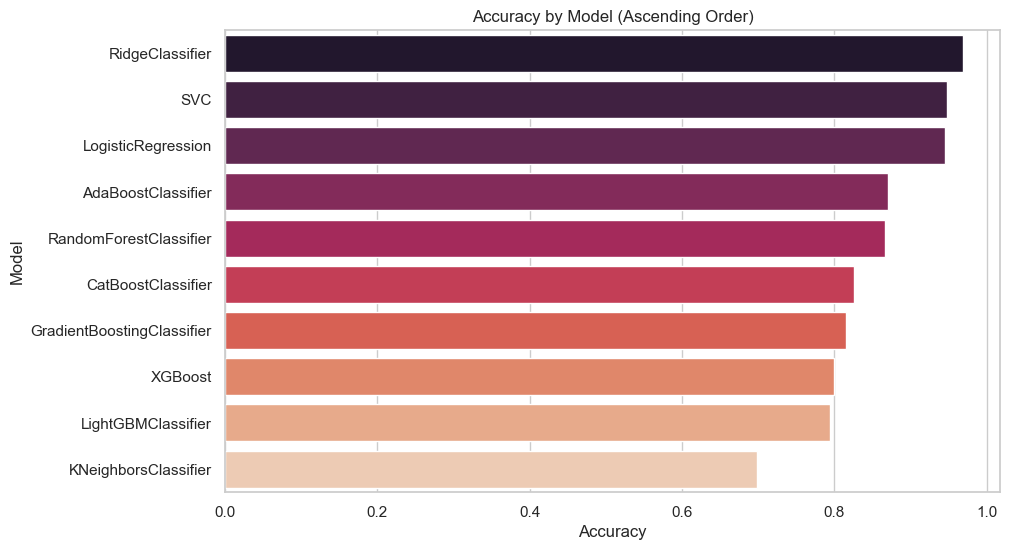

In [206]:
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
ax = sns.barplot(x='Accuracy', y='Model', data=results.sort_values(by='Accuracy', ascending=False), palette="rocket")
ax.set(xlabel="Accuracy", ylabel="Model")
plt.title("Accuracy by Model (Ascending Order)")
plt.show()

#### 8.4.1 Cross Validation

Looked it with 10 fold Stratified cross validation

In [207]:
skf = StratifiedKFold(n_splits=10, random_state=34, shuffle=True)

In [208]:
models_cv = {
    'LogisticRegression': LogisticRegression(C=log_cv_best_params['C'],
                                             penalty=log_cv_best_params['penalty'],
                                             solver=log_cv_best_params['solver']),
    'RidgeClassifier': RidgeClassifier(alpha=ridge_cv_best_params['alpha']),
    'SVC': SVC(kernel=svc_cv_best_params['kernel'],
               C=svc_cv_best_params['C'])    
}

In [209]:
model_scores = {
    'LogisticRegression':{
        'Accuracy':[],
        'Precision':[],
        'Recall':[],
        'F1_Score':[]
    },
    'RidgeClassifier':{
        'Accuracy':[],
        'Precision':[],
        'Recall':[],
        'F1_Score':[]
    },
    'SVC':{
        'Accuracy':[],
        'Precision':[],
        'Recall':[],
        'F1_Score':[] 
    }
}

In [210]:
for model_name, model_instance in models_cv.items():
    for i, (train_index, test_index) in enumerate(skf.split(X_train_ohe, y_train)):
        train_x = X_train_ohe.iloc[train_index]
        train_y = y_train.iloc[train_index]
        test_x  = X_train_ohe.iloc[test_index]
        test_y  = y_train.iloc[test_index]

        
        
        model_instance.fit(train_x, train_y)
        y_pred = model_instance.predict(test_x)    
        if model_name not in ['RidgeClassifier','SVC']:
            y_pred_prob = model_instance.predict_proba(test_x)    
            auc_score = round(roc_auc_score(test_y, y_pred_prob[:, 1]), 4)    
        accuracy = round(accuracy_score(test_y,y_pred),4)
        precision = precision_score(test_y,y_pred)
        recall = recall_score(test_y,y_pred)
        f1_sc = f1_score(test_y,y_pred)
        
        model_scores[model_name]['Accuracy'].append(accuracy)
        model_scores[model_name]['Precision'].append(precision)
        model_scores[model_name]['Recall'].append(recall)
        model_scores[model_name]['F1_Score'].append(f1_sc)
        
        

#### 8.4.2 Results

In [211]:
final_result = pd.DataFrame(index=['Accuracy','Precision','Recall','F1_Score'],columns=['LogisticRegression','RidgeClassifier','SVC'])

In [212]:
for model_name, model_instance in models_cv.items():
    final_result[model_name].loc['Accuracy'] = np.array(model_scores[model_name]['Accuracy']).mean()
    final_result[model_name].loc['Precision'] = np.array(model_scores[model_name]['Precision']).mean()
    final_result[model_name].loc['Recall'] = np.array(model_scores[model_name]['Recall']).mean()
    final_result[model_name].loc['F1_Score'] = np.array(model_scores[model_name]['F1_Score']).mean()


In [213]:
final_result=final_result.T

In [214]:
final_result['Dist_Max_Accuracy']= final_result['Accuracy']-final_result['Accuracy'].max()
final_result['Dist_Max_Precision']= final_result['Precision']-final_result['Precision'].max()
final_result['Dist_Max_Recall']= final_result['Recall']-final_result['Recall'].max()
final_result['Dist_Max_F1_Score']= final_result['F1_Score']-final_result['F1_Score'].max()

In [215]:
final_result.sort_values(by='Accuracy',ascending=False)

,Accuracy,Precision,Recall,F1_Score,Dist_Max_Accuracy,Dist_Max_Precision,Dist_Max_Recall,Dist_Max_F1_Score
LogisticRegression,0.80919,0.764968,0.72479,0.743512,0.0,0.0,-0.017647,-0.002955
SVC,0.80804,0.752678,0.742437,0.746467,-0.00115,-0.01229,0.0,0.0
RidgeClassifier,0.8058,0.75731,0.72479,0.739781,-0.00339,-0.007658,-0.017647,-0.006686


In [216]:
final_result.sort_values(by='Precision',ascending=False)

,Accuracy,Precision,Recall,F1_Score,Dist_Max_Accuracy,Dist_Max_Precision,Dist_Max_Recall,Dist_Max_F1_Score
LogisticRegression,0.80919,0.764968,0.72479,0.743512,0.0,0.0,-0.017647,-0.002955
RidgeClassifier,0.8058,0.75731,0.72479,0.739781,-0.00339,-0.007658,-0.017647,-0.006686
SVC,0.80804,0.752678,0.742437,0.746467,-0.00115,-0.01229,0.0,0.0


In [217]:
final_result.sort_values(by='Recall',ascending=False)

,Accuracy,Precision,Recall,F1_Score,Dist_Max_Accuracy,Dist_Max_Precision,Dist_Max_Recall,Dist_Max_F1_Score
SVC,0.80804,0.752678,0.742437,0.746467,-0.00115,-0.01229,0.0,0.0
LogisticRegression,0.80919,0.764968,0.72479,0.743512,0.0,0.0,-0.017647,-0.002955
RidgeClassifier,0.8058,0.75731,0.72479,0.739781,-0.00339,-0.007658,-0.017647,-0.006686


In [218]:
final_result.sort_values(by='F1_Score',ascending=False)

,Accuracy,Precision,Recall,F1_Score,Dist_Max_Accuracy,Dist_Max_Precision,Dist_Max_Recall,Dist_Max_F1_Score
SVC,0.80804,0.752678,0.742437,0.746467,-0.00115,-0.01229,0.0,0.0
LogisticRegression,0.80919,0.764968,0.72479,0.743512,0.0,0.0,-0.017647,-0.002955
RidgeClassifier,0.8058,0.75731,0.72479,0.739781,-0.00339,-0.007658,-0.017647,-0.006686
